In [1]:
import sys
sys.path.append('..')
from experiments import perform_gradcam, perform_lrp_captum, perform_lrp_plain, WrapperNet
from internal_utils import preprocess_images, condense_to_heatmap, blur_image_batch, add_random_noise_batch, get_data_imagenette, get_teacher_model
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
import torch.nn.functional as F
import torchvision.transforms.functional as TF

def visualise_panel_image(image, model, kernel_size_min, kernel_size_max, noise_level_min, noise_level_max, method, label):
    """Visualise the panel of images for the model."""
    # Assume the image tensor is already in batch format, if not, unsqueeze it
    if image.dim() == 3:
        image = image.unsqueeze(0)
    
    original_image = image
    # treated images
    blurred_small = blur_image_batch(image, kernel_size_min)
    blurred_large = blur_image_batch(image, kernel_size_max)
    noisy_small = add_random_noise_batch(image, noise_level_min)
    noisy_large = add_random_noise_batch(image, noise_level_max)
    
    # model outputs
    original_heatmap = condense_to_heatmap(method(preprocess_images(image), label, model)).detach()
    blurred_small_heatmap = condense_to_heatmap(method(preprocess_images(blurred_small), label, model)).detach()
    blurred_large_heatmap = condense_to_heatmap(method(preprocess_images(blurred_large),label,  model)).detach()
    noisy_small_heatmap = condense_to_heatmap( method(preprocess_images(noisy_small), label, model)).detach()
    noisy_large_heatmap = condense_to_heatmap(method(preprocess_images(noisy_large), label, model)).detach()
    
    # Display images
    fig, ax = plt.subplots(2, 5, figsize=(15, 5))
    ax[0][0].imshow(original_image.squeeze().permute(1, 2, 0).cpu().numpy())
    ax[0][0].set_title('Original Image')
    ax[0][1].imshow(blurred_small.squeeze().permute(1, 2, 0).cpu().numpy())
    ax[0][1].set_title('Small Blurred Image')
    ax[0][2].imshow(blurred_large.squeeze().permute(1, 2, 0).cpu().numpy())
    ax[0][2].set_title('Large Blurred Image')
    ax[0][3].imshow(noisy_small.squeeze().detach().permute(1, 2, 0).cpu().numpy())  # Example visualization
    ax[0][3].set_title('Small Noisy Image')
    ax[0][4].imshow(noisy_large.squeeze().detach().permute(1, 2, 0).cpu().numpy())  # Example visualization
    ax[0][4].set_title('Large Noisy Image')
    
    ax[1][0].imshow(original_heatmap.squeeze(0), cmap='seismic')
    ax[1][0].set_title('Original Heatmap')
    ax[1][1].imshow(blurred_small_heatmap.squeeze(0), cmap='seismic')
    ax[1][1].set_title('Small Blurred Heatmap')
    ax[1][2].imshow(blurred_large_heatmap.squeeze(0), cmap='seismic')
    ax[1][2].set_title('Large Blurred Heatmap')
    ax[1][3].imshow(noisy_small_heatmap.squeeze(0), cmap ='seismic')  # Example visualization
    ax[1][3].set_title('Small Noisy Heatmap')
    ax[1][4].imshow(noisy_large_heatmap.squeeze(0), cmap ='seismic')  # Example visualization
    ax[1][4].set_title('Large Noisy Heatmap')
    
    for i in ax:
        for j in i:
            j.axis('off')
    plt.show()

In [2]:
data = get_data_imagenette()
input_images, labels = next(iter(data))
model = get_teacher_model()
# define params
kernel_size_min = 3
kernel_size_max = 5
noise_level_min = 0.1
noise_level_max = 0.2


normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 0.9999999403953552
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.34520248..1.2373916].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.69296247..1.8080928].


normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0000001192092896


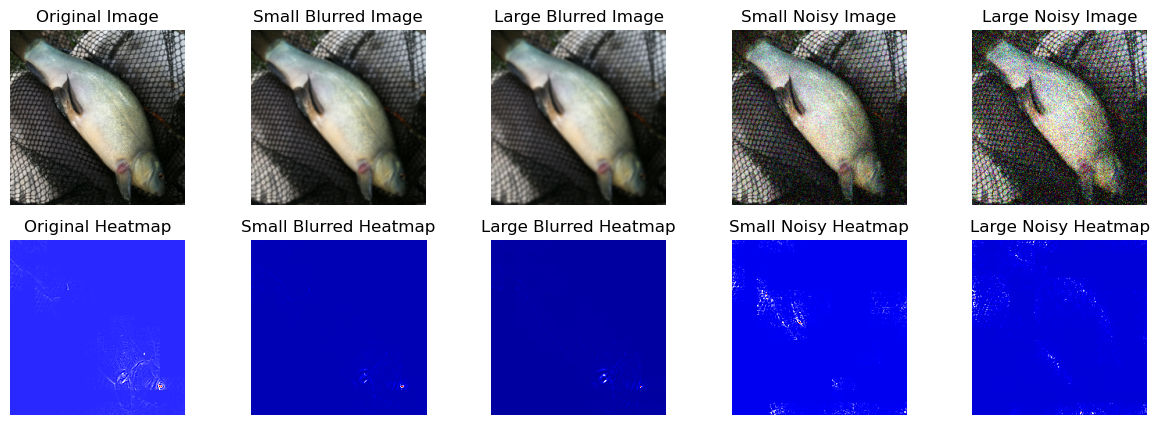

In [6]:

image, label = input_images[4], labels[4]

visualise_panel_image(image, model, kernel_size_min, kernel_size_max, noise_level_min, noise_level_max, perform_gradcam, label)

normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0000014305114746
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.000001311302185
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 0.9999979734420776
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.32814193..1.2428788].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.867948..1.5946043].


normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0000001192092896


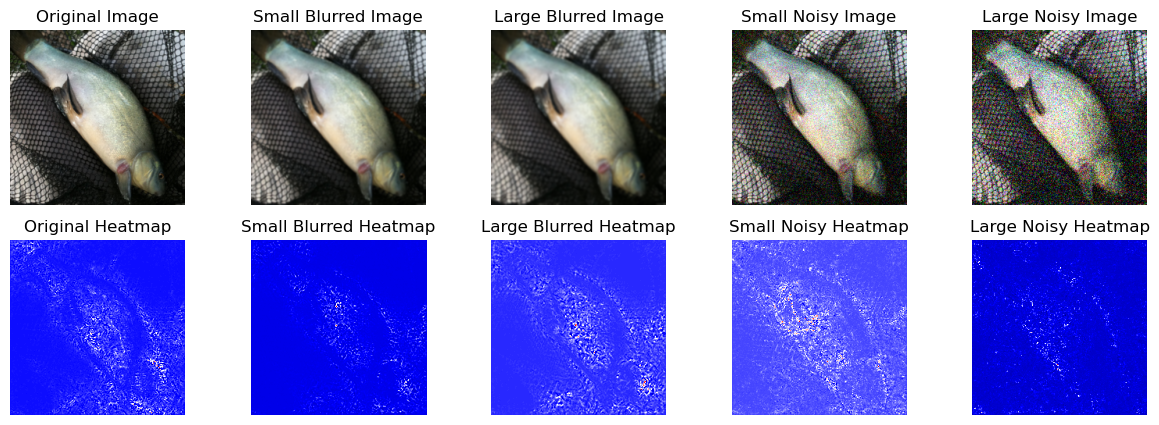

In [7]:
visualise_panel_image(image, model, kernel_size_min, kernel_size_max, noise_level_min, noise_level_max, perform_lrp_captum, label)

normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0000001192092896
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 0.9999999403953552
normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.34062317..1.2758344].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88567036..1.6236756].


normalized_tensor shape: torch.Size([1, 3, 224, 224])
normalized_tensor sum: 0.9999999403953552


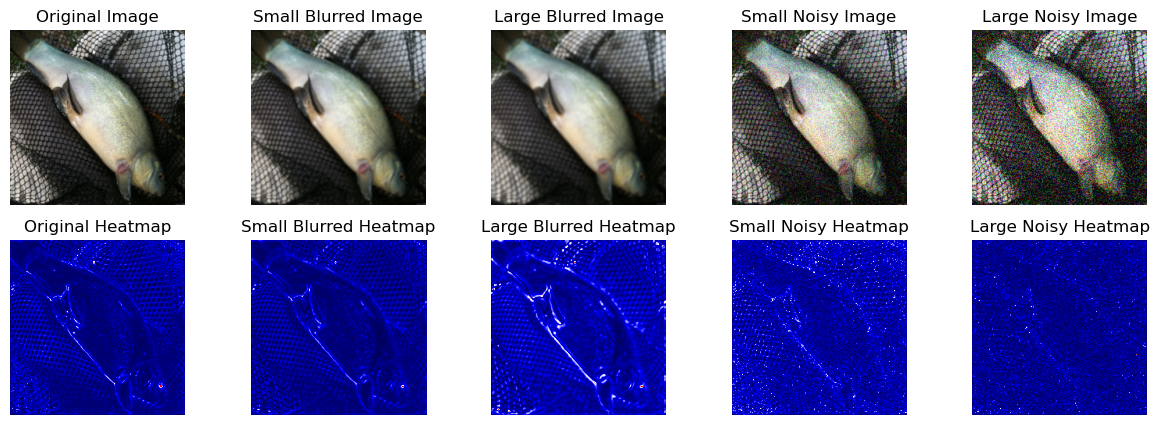

In [8]:
import torch
visualise_panel_image(image, WrapperNet(model, hybrid_loss=True), kernel_size_min, kernel_size_max, noise_level_min, noise_level_max, perform_lrp_plain, label.unsqueeze(0))